In [123]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")

In [124]:
df = pd.read_csv("G:/Datasets/Classification/Titanic/train.csv")
df[:5]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Simple Data Exploration

In [125]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [126]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [127]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

# Treating Missing Values

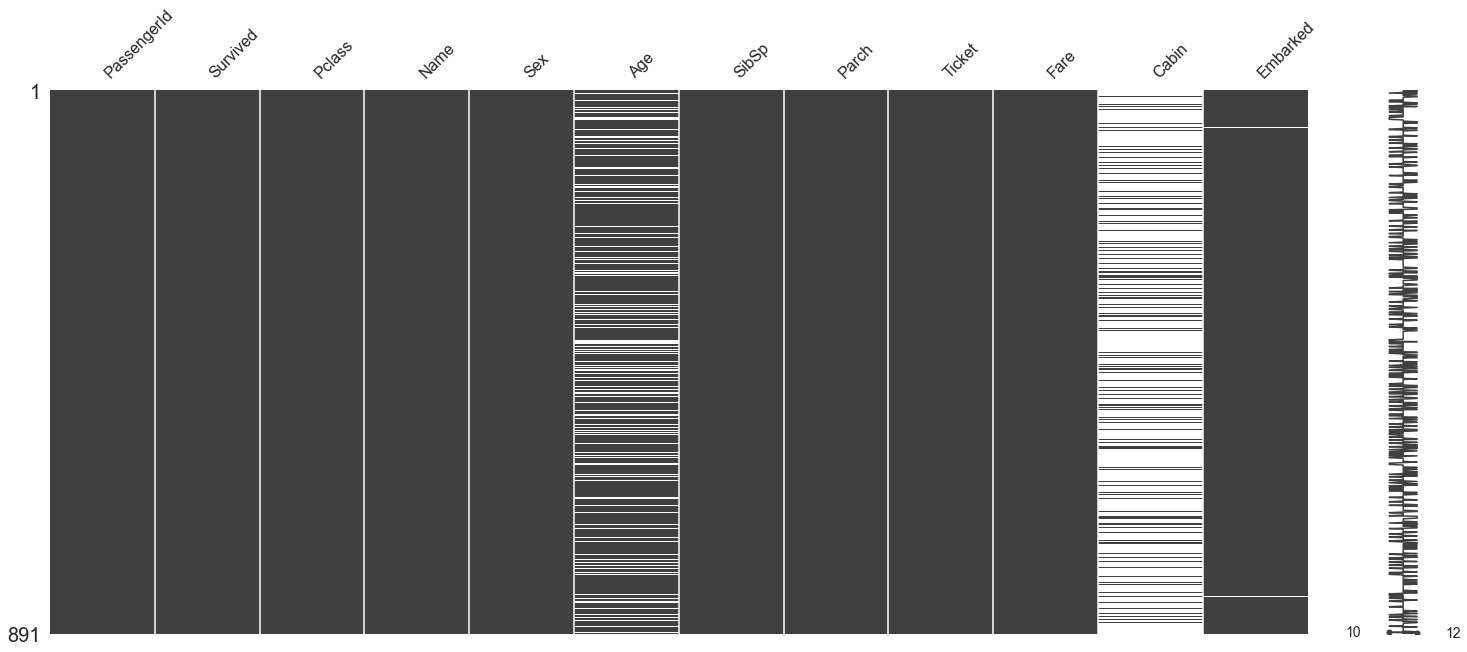

In [128]:
import missingno as msno
msno.matrix(df);

In [129]:
print("Size of DataFrame : ",df.shape[0])
print("Number of Columns in DataFrame : ",df.shape[1])
print("\nNumber of missing values of each column\n")
print(df.isnull().sum().sort_values(ascending=False))

Size of DataFrame :  891
Number of Columns in DataFrame :  12

Number of missing values of each column

Cabin          687
Age            177
Embarked         2
Fare             0
Ticket           0
Parch            0
SibSp            0
Sex              0
Name             0
Pclass           0
Survived         0
PassengerId      0
dtype: int64


### Since Cabin,Age and Embarked have missing values so we should deal with them become building our model.

### Dealing with Cabin feature

In [130]:
pd.options.display.max_rows = 1000

In [131]:
df["Cabin"].value_counts()

C23 C25 C27        4
B96 B98            4
G6                 4
F33                3
F2                 3
C22 C26            3
E101               3
D                  3
C93                2
C124               2
E33                2
B58 B60            2
C123               2
E24                2
D36                2
F4                 2
C78                2
D26                2
F G73              2
D20                2
E44                2
B35                2
D35                2
B22                2
C125               2
B18                2
E8                 2
E25                2
E121               2
C126               2
D17                2
E67                2
C52                2
C68                2
B49                2
B57 B59 B63 B66    2
C83                2
B51 B53 B55        2
B77                2
C2                 2
B28                2
C92                2
D33                2
B5                 2
B20                2
C65                2
C85                1
C110         

In [132]:
pd.options.display.max_rows = 100

 Cabin column contains missing more than 70% of the size of dataset so we can't replace it with any value
 and Cabin column contains Object datatypes and have very large amount of categories,
 So we should drop the Cabin column.

In [133]:
df = df.drop("Cabin",axis=1)

### Dealing with Age variable

In [134]:
## Mean of the Age of those people who didn't survived
print(df[df["Survived"]==0].Age.mean())

## Number of missing values in Age column of those people who didn't survived
print(df[df["Survived"]==0].Age.isnull().sum())

30.62617924528302
125


In [135]:
## Mean of the Age of those people who survived
print(df[df["Survived"]==1].Age.mean())

## Number of missing values in Age column of those people who survived
print(df[df["Survived"]==1].Age.isnull().sum())

28.343689655172415
52


This show that number missing values of people who didn't survived is more than the people survived

We can replace the missing value of age column with the mean value of age column

In [136]:
df["Age"].mean()

29.69911764705882

In [137]:
df.loc[df["Age"].isnull(),"Age"]=29.7

### Dealing with Embarked feature

In [138]:
df.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [139]:
df.loc[df["Embarked"].isnull(),"Embarked"]='S'

In [140]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

# Data Cleaning

In [141]:
df.Ticket.nunique()

681

Since ticket is categorical variable and have 681 unique values/categories and size of dataset in 891 <br>
So it has no/very less effect on our model so we can drop it.

In [142]:
df = df.drop("Ticket",axis=1)

Since survival does not depend on the name of the person so we can drop that column too.

In [143]:
df = df.drop("Name",axis=1)

### Since some of the feature in our dataset are of object type and we cannot use them directy in our Model building. <br> So we need to change object type variable to integer type variable

# Categorical to Integer

In [144]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Sex             object
Age            float64
SibSp            int64
Parch            int64
Fare           float64
Embarked        object
dtype: object

Sex and Embarked are those features that we have to convert.

In [145]:
# Before conversion
print(df.Sex.value_counts())

from sklearn.preprocessing import LabelEncoder
df["Sex"] = LabelEncoder().fit_transform(df.Sex)

# After coversion
print(df.Sex.value_counts())

male      577
female    314
Name: Sex, dtype: int64
1    577
0    314
Name: Sex, dtype: int64


In [146]:
# Before conversion
print(df.Embarked.value_counts())

from sklearn.preprocessing import LabelEncoder
df["Embarked"] = LabelEncoder().fit_transform(df.Embarked)

print(df.Embarked.value_counts())

S    646
C    168
Q     77
Name: Embarked, dtype: int64
2    646
0    168
1     77
Name: Embarked, dtype: int64


In [147]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Sex              int32
Age            float64
SibSp            int64
Parch            int64
Fare           float64
Embarked         int32
dtype: object

# Dealing with Outliers

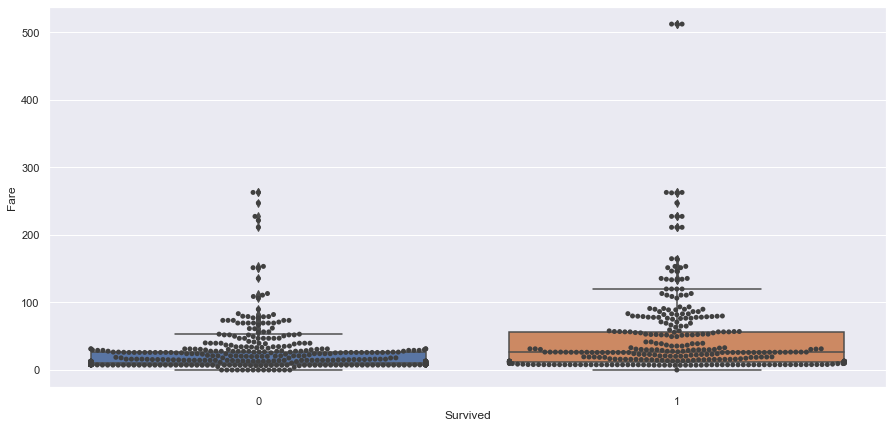

In [148]:
plt.figure(figsize=[15,7])
sns.boxplot(y=df["Fare"],x=df["Survived"])
sns.swarmplot(y="Fare",x="Survived",data=df,color='0.25')

In [149]:
df[df.Fare>180]

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
27,28,0,1,1,19.0,3,2,263.0000,2
88,89,1,1,0,23.0,3,2,263.0000,2
118,119,0,1,1,24.0,0,1,247.5208,0
258,259,1,1,0,35.0,0,0,512.3292,0
299,300,1,1,0,50.0,0,1,247.5208,0
311,312,1,1,0,18.0,2,2,262.3750,0
341,342,1,1,0,24.0,3,2,263.0000,2
377,378,0,1,1,27.0,0,2,211.5000,0
380,381,1,1,0,42.0,0,0,227.5250,0
438,439,0,1,1,64.0,1,4,263.0000,2


Removing rows whose Fare value is less than 180

In [150]:
df = df[df.Fare<180]

# PassengerId

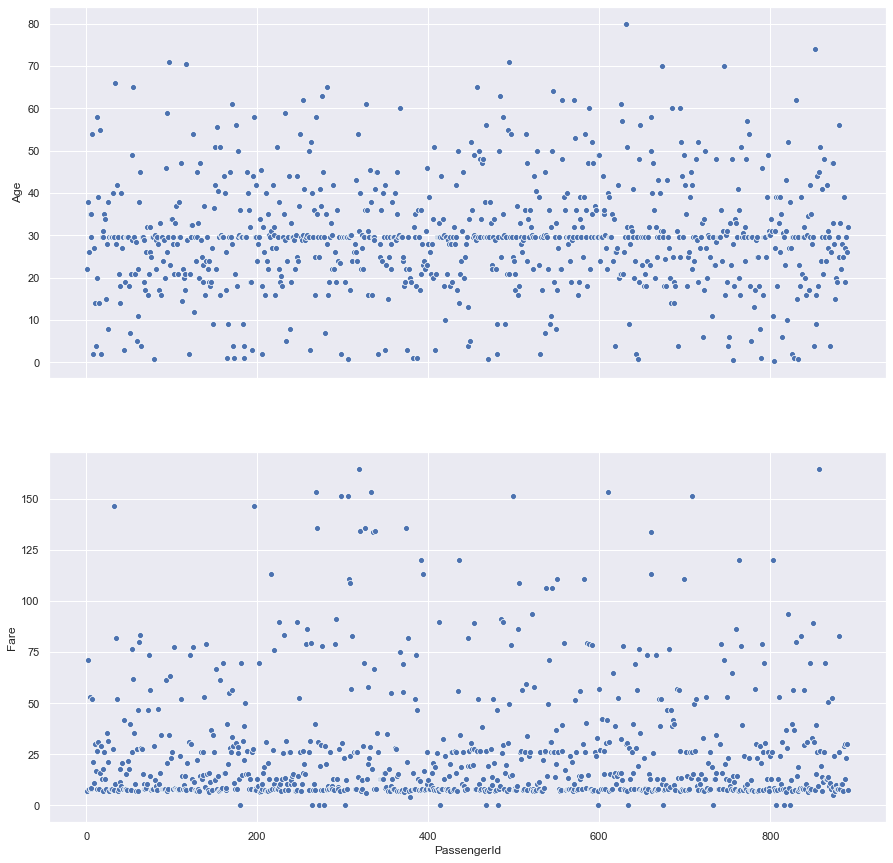

In [151]:
f, axes = plt.subplots(2, 1, figsize=(15,15), sharex=True)

sns.scatterplot(x="PassengerId",y="Age",data=df,ax=axes[0])
sns.scatterplot(x="PassengerId",y="Fare",data=df,ax=axes[1]);

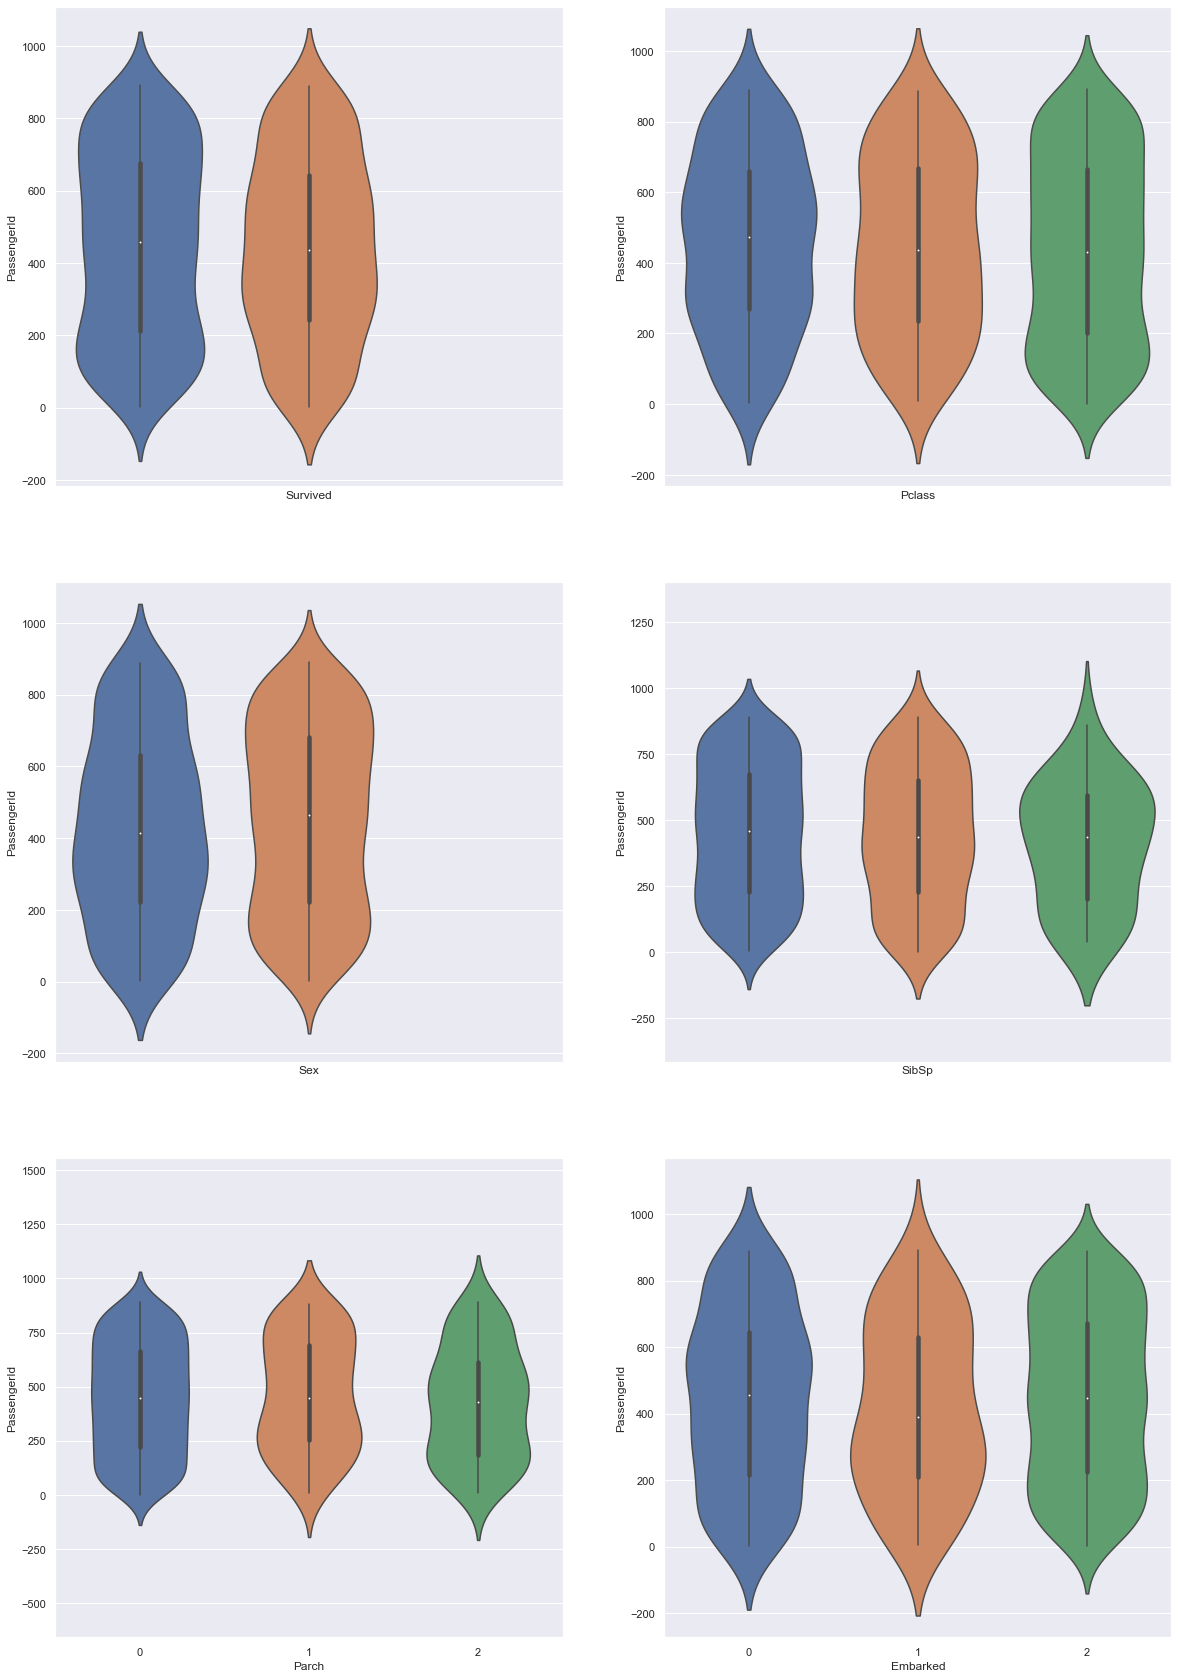

In [152]:
categorical_features = df.drop(["PassengerId","Age","Fare"],axis=1).columns
f, axes = plt.subplots(3, 2, figsize=(20,30), sharex=True)

for i,j in zip(range(3),range(0,len(categorical_features),2)):
        sns.violinplot(x=categorical_features[j],y="PassengerId",data=df,ax=axes[i,0])
        sns.violinplot(x=categorical_features[j+1],y="PassengerId",data=df,ax=axes[i,1]);

<ul>
    <li>Since there is some effect of PassengerId in our dataset so we cannot remove PassengerId column.</li>
</ul>

# Data Visualization

In [153]:
# import pandas_profiling as pp
# pp.ProfileReport(df)

# ### For getting details from our dataset.

## Bivariate Analysis

In [154]:
sns.set(style="darkgrid")

In [155]:
df.Pclass.value_counts()

3    491
1    196
2    184
Name: Pclass, dtype: int64

In [156]:
df[df.Survived==1].Pclass.value_counts()

1    122
3    119
2     87
Name: Pclass, dtype: int64

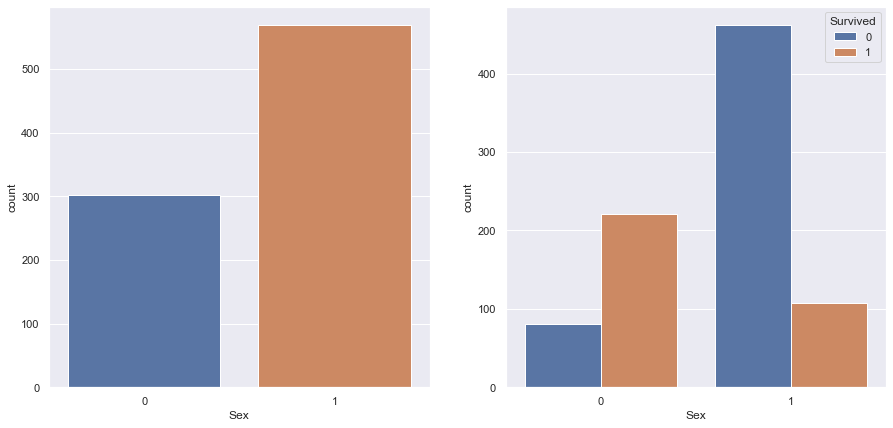

In [157]:
f, axes = plt.subplots(1, 2, figsize=(15,7))
ax = sns.countplot("Sex",data=df,ax=axes[0])
ax = sns.countplot("Sex",hue="Survived",data=df,ax=axes[1])

##### X axis: 
0 : Female <br> 1 : Male
##### Legend:
0 : Died <br> 1 : Survived

<ul>
    <li>As we can see before accident there were more male than female(about 2 time the female).
    <br></li>
    <li>After the accident there were more female than male.
    <br></li>
    <li>This shows that female have more chances of survival than male which is approximately 4 times that of male
    </li>
<ul>

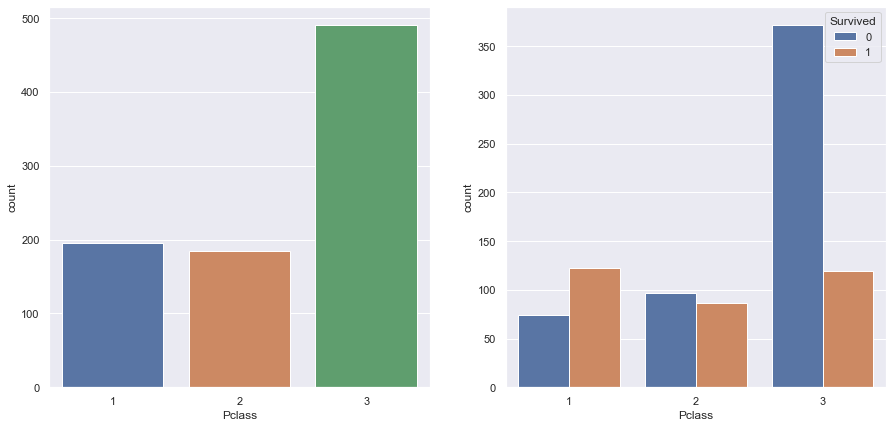

In [158]:
f, axes = plt.subplots(1, 2, figsize=(15,7))
ax = sns.countplot("Pclass",data=df,ax=axes[0])
ax = sns.countplot("Pclass",hue="Survived",data=df,ax=axes[1])

##### X axis: 
1 : Pclass 1 <br> 2 : Pclass 2 <br> 3 : Pclass 3
##### Legend:
0 : Died <br> 1 : Survived

##### This shows that :
<ul>
    <li>The person belonging to Pclass(Passenger class) 1 have highest chances of survival than other Pclasses.
    <br></li>
    <li>The person belonging to Pclass 3 have least chance of survival than other classes
    </li>
</ul>

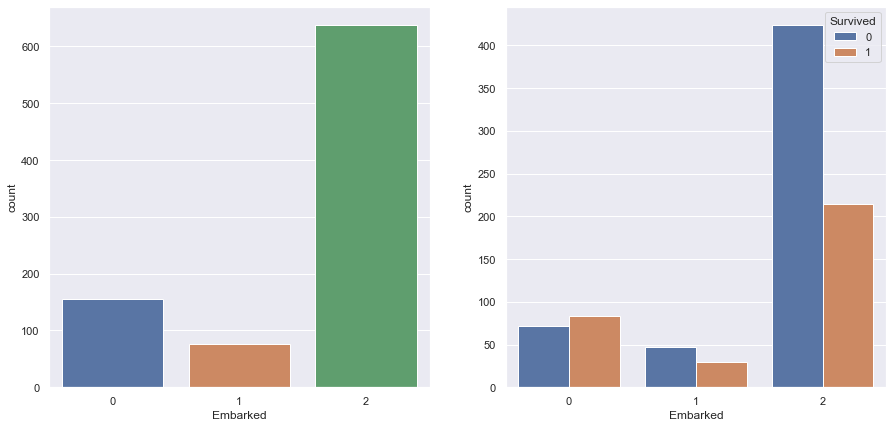

In [159]:
f, axes = plt.subplots(1, 2, figsize=(15,7))
ax = sns.countplot("Embarked",data=df,ax=axes[0])
ax = sns.countplot("Embarked",hue="Survived",data=df,ax=axes[1])

##### X axis: 
1 : Embarked C <br> 2 : Embarked Q <br> 3 : Embarked S
##### Legend:
0 : Died <br> 1 : Survived

###### This shows that :
<ul>
    <li>Person who Embarked at C(0) have more chances of survival than the other classes.</li>
    <li>Person who Embarked at C(2) have very less chances of survival.</li>
    </li>
</ul>

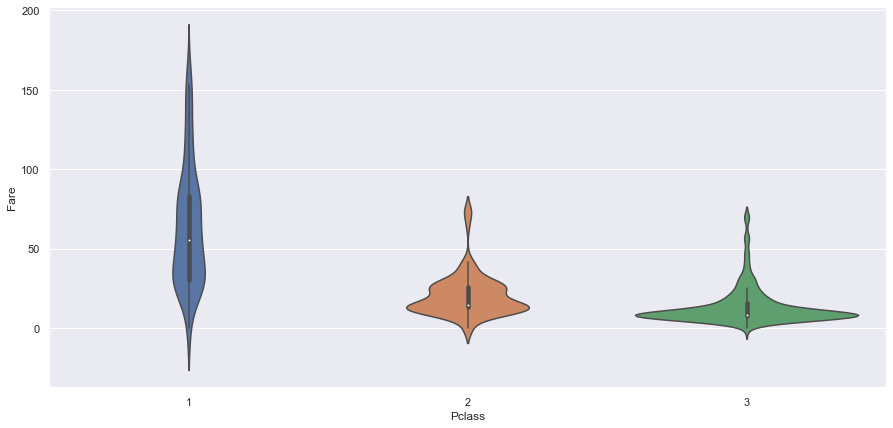

In [160]:
plt.figure(figsize=[15,7])
sns.violinplot(x="Pclass",y="Fare",data=df);

##### This shows that:
<ul>
    <li>People having Fare above 90-100 belong to Pclass 1</li>
    <li>People having Fare between 0-15 have more chances of belonging to Pclass 3</li>
    <li>People having Fare between 15-30 have more chances of belonging to Pclass 2</li>
    <li>People having Fare above 50 have more chances of belonging to Pclass 1</li>
</ul>
    

## Correlation Plot 
### To know dependancy of one element on another.

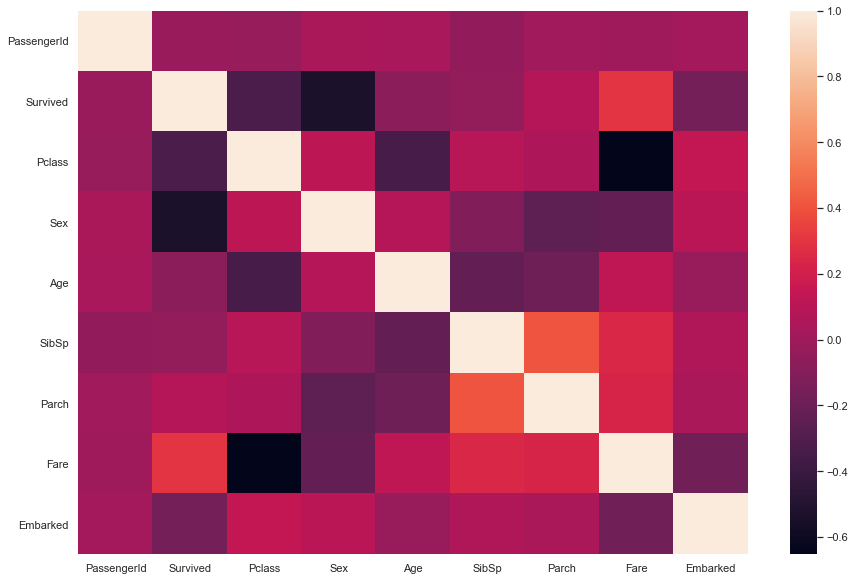

In [161]:
plt.figure(figsize=[15,10])
sns.heatmap(df.corr(),color="black")

# Feature Scaling & Data Spliting

In [209]:
X_train_temp=X_train
X_train_temp=X_test
y_train_temp=y_train
y_test_temp=y_test

In [190]:
# Spliting data
X = df.drop("Survived",axis=1)
y = df["Survived"]

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,random_State=0)

### Standardization of Data

In [191]:
from sklearn import preprocessing
X_train_scaled = preprocessing.scale(X_train)
X_test_scaled = preprocessing.scale(X_test)

In [192]:
X_train_scaled[:5]

array([[ 0.58947476,  0.81575813,  0.72505237,  0.00584558, -0.48920195,
        -0.48837695, -0.64493766,  0.55864919],
       [-0.79280251, -1.60556031,  0.72505237,  0.55676103,  0.44213588,
         0.77213747,  0.81400865,  0.55864919],
       [-1.30968806,  0.81575813,  0.72505237,  3.08493464, -0.48920195,
        -0.48837695, -0.6497008 , -0.73496045],
       [-0.08795857,  0.81575813,  0.72505237,  0.00584558, -0.48920195,
        -0.48837695, -0.6497008 , -0.73496045],
       [ 1.20425531,  0.81575813,  0.72505237,  0.33035742, -0.48920195,
        -0.48837695, -0.6399001 ,  0.55864919]])

### Scaling features to a range

In [193]:
# Scale the data in range between 1 and 0.

X_train_minmax = preprocessing.MinMaxScaler().fit_transform(X_train)
X_test_minmax = preprocessing.MinMaxScaler().fit_transform(X_test)

In [194]:
X_train_minmax[:5]

array([[0.67491564, 1.        , 1.        , 0.39793422, 0.        ,
        0.        , 0.04789202, 1.        ],
       [0.27784027, 0.        , 1.        , 0.49714596, 0.125     ,
        0.16666667, 0.31876783, 1.        ],
       [0.12935883, 1.        , 1.        , 0.95243273, 0.        ,
        0.        , 0.04700767, 0.5       ],
       [0.48031496, 1.        , 1.        , 0.39793422, 0.        ,
        0.        , 0.04700767, 0.5       ],
       [0.85151856, 1.        , 1.        , 0.45637401, 0.        ,
        0.        , 0.04882733, 1.        ]])

# Model Building

In [195]:
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

In [196]:
models = [
            "Neural network",
            "kNN",
            "SVM",
            "GaussianProcess",
            "RBF",
            "DecisionTree",
            "RandomForest",
            "AdaBoost",
            "Naive_bayes",
            "Discriminant analysis",
            "Logistic Regression",
         ]
Classifiers = [
            MLPClassifier(max_iter=10000,random_state=False),
            KNeighborsClassifier(),
            SVC(kernel="linear",random_state=False),
            SVC(kernel='rbf',random_state=False),
            GaussianProcessClassifier(random_state=False),
            DecisionTreeClassifier(random_state=False),
            RandomForestClassifier(random_state=False),
            AdaBoostClassifier(random_state=False),
            GaussianNB(),
            QuadraticDiscriminantAnalysis(),
            LogisticRegression(max_iter=10000,random_state=0)
]

## Model building on Simple dataset

In [197]:
for name,classifier in zip(models,Classifiers):
    print(name," :")
    model = classifier.fit(X_train,y_train)
    print("\tTraining Score :",model.score(X_train,y_train))
    print("\tTesting Score :",model.score(X_test,y_test),"\n")

Neural network  :
	Training Score : 0.7396630934150077
	Testing Score : 0.7247706422018348 

kNN  :
	Training Score : 0.7335375191424196
	Testing Score : 0.6009174311926605 

SVM  :
	Training Score : 0.7733537519142419
	Testing Score : 0.8256880733944955 

GaussianProcess  :
	Training Score : 0.6584992343032159
	Testing Score : 0.6834862385321101 

RBF  :
	Training Score : 1.0
	Testing Score : 0.5642201834862385 

DecisionTree  :
	Training Score : 1.0
	Testing Score : 0.7339449541284404 

RandomForest  :
	Training Score : 1.0
	Testing Score : 0.8486238532110092 

AdaBoost  :
	Training Score : 0.8330781010719756
	Testing Score : 0.8027522935779816 

Naive_bayes  :
	Training Score : 0.7840735068912711
	Testing Score : 0.7889908256880734 

Discriminant analysis  :
	Training Score : 0.8070444104134763
	Testing Score : 0.8119266055045872 

Logistic Regression  :
	Training Score : 0.7917304747320061
	Testing Score : 0.8119266055045872 



## Model building on Standarized Dataset

In [198]:
for name,classifier in zip(models,Classifiers):
    print(name," :")
    model = classifier.fit(X_train_scaled,y_train)
    print("\tTraining Score :",model.score(X_train_scaled,y_train))
    print("\tTesting Score :",model.score(X_test_scaled,y_test),"\n")

Neural network  :
	Training Score : 0.9035222052067381
	Testing Score : 0.8211009174311926 

kNN  :
	Training Score : 0.8483920367534457
	Testing Score : 0.7981651376146789 

SVM  :
	Training Score : 0.7733537519142419
	Testing Score : 0.8165137614678899 

GaussianProcess  :
	Training Score : 0.8392036753445635
	Testing Score : 0.8348623853211009 

RBF  :
	Training Score : 0.8759571209800919
	Testing Score : 0.8027522935779816 

DecisionTree  :
	Training Score : 1.0
	Testing Score : 0.7201834862385321 

RandomForest  :
	Training Score : 1.0
	Testing Score : 0.8165137614678899 

AdaBoost  :
	Training Score : 0.8330781010719756
	Testing Score : 0.8073394495412844 

Naive_bayes  :
	Training Score : 0.7840735068912711
	Testing Score : 0.7844036697247706 

Discriminant analysis  :
	Training Score : 0.8070444104134763
	Testing Score : 0.7981651376146789 

Logistic Regression  :
	Training Score : 0.7917304747320061
	Testing Score : 0.8165137614678899 



## Model building on Scaled data

In [199]:
for name,classifier in zip(models,Classifiers):
    print(name," :")
    model = classifier.fit(X_train_minmax,y_train)
    print("\tTraining Score :",model.score(X_train_minmax,y_train))
    print("\tTesting Score :",model.score(X_test_minmax,y_test),"\n")

Neural network  :
	Training Score : 0.8376722817764165
	Testing Score : 0.8348623853211009 

kNN  :
	Training Score : 0.8514548238897397
	Testing Score : 0.7981651376146789 

SVM  :
	Training Score : 0.7733537519142419
	Testing Score : 0.8165137614678899 

GaussianProcess  :
	Training Score : 0.8116385911179173
	Testing Score : 0.8256880733944955 

RBF  :
	Training Score : 0.8162327718223583
	Testing Score : 0.8302752293577982 

DecisionTree  :
	Training Score : 1.0
	Testing Score : 0.6834862385321101 

RandomForest  :
	Training Score : 1.0
	Testing Score : 0.8027522935779816 

AdaBoost  :
	Training Score : 0.8330781010719756
	Testing Score : 0.7889908256880734 

Naive_bayes  :
	Training Score : 0.7840735068912711
	Testing Score : 0.7889908256880734 

Discriminant analysis  :
	Training Score : 0.8070444104134763
	Testing Score : 0.7981651376146789 

Logistic Regression  :
	Training Score : 0.7901990811638591
	Testing Score : 0.8073394495412844 



In [200]:
clf_name = "GaussianProcess"
clf = SVC(kernel='rbf',random_state=False)

final_model = clf.fit(X_train_scaled,y_train)

# Test Data

In [262]:
test = pd.read_csv("G:/Datasets/Classification/Titanic/test.csv")
test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [263]:
test = test.drop("Cabin",axis=1)

In [264]:
test.isnull().sum()

PassengerId     0
Pclass          0
Name            0
Sex             0
Age            86
SibSp           0
Parch           0
Ticket          0
Fare            1
Embarked        0
dtype: int64

In [266]:
test.loc[test["Age"].isnull(),"Age"]=29.7
test.loc[test["Embarked"].isnull(),"Embarked"]='S'
test= test.drop("Ticket",axis=1)
test= test.drop("Name",axis=1)
test.loc[test["Fare"].isnull(),"Fare"]=36
test.isnull().sum()

PassengerId    0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64

In [267]:
test["Sex"] = LabelEncoder().fit_transform(test.Sex)
test["Embarked"] = LabelEncoder().fit_transform(test.Embarked)

In [257]:
test_scaled = preprocessing.scale(test)

In [269]:
test_pred = final_model.predict(test_scaled)

In [271]:
pd.DataFrame({
    'PassengerId':test.PassengerId,
    'Survived':test_pred
}).to_csv('final_result.csv' , index = False)